In [1]:
import pandas as pd
import numpy as np
from sklearn.svm import SVC
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

In [2]:
df = pd.read_csv("C:/123/SRMAP/Semester 6/Machine Learning Lab/Lab_Task-11/Social_Network_Ads.csv")
df.head()

,User ID,Gender,Age,EstimatedSalary,Purchased
0,15624510,Male,19,19000,0
1,15810944,Male,35,20000,0
2,15668575,Female,26,43000,0
3,15603246,Female,27,57000,0
4,15804002,Male,19,76000,0


In [3]:
df.tail()

,User ID,Gender,Age,EstimatedSalary,Purchased
395,15691863,Female,46,41000,1
396,15706071,Male,51,23000,1
397,15654296,Female,50,20000,1
398,15755018,Male,36,33000,0
399,15594041,Female,49,36000,1


In [4]:
# Convert categorical Gender to numerical values
df['Gender'] = df['Gender'].map({'Male': 1, 'Female': -1})

In [5]:
# Separate features and labels
X = df[['Gender', 'Age', 'EstimatedSalary']]
y = df['Purchased']

In [6]:
# Check for NaN or infinite values in the input data
print("NaN values in X:", np.isnan(X).any())
print("Infinite values in X:", np.isinf(X).any())
print("NaN values in y:", np.isnan(y).any())
print("Infinite values in y:", np.isinf(y).any())
X.head(20)

NaN values in X: Gender             False
Age                False
EstimatedSalary    False
dtype: bool
Infinite values in X: Gender             False
Age                False
EstimatedSalary    False
dtype: bool
NaN values in y: False
Infinite values in y: False


,Gender,Age,EstimatedSalary
0,1,19,19000
1,1,35,20000
2,-1,26,43000
3,-1,27,57000
4,1,19,76000
5,1,27,58000
6,-1,27,84000
7,-1,32,150000
8,1,25,33000
9,-1,35,65000


In [7]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=32)

In [8]:
# Feature scaling (optional, but often recommended for SVMs)
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

In [9]:
# Instantiate the SVM model
svm_model = SVC(kernel='linear')  # We can choose different kernels such as 'rbf', 'poly', etc.

In [10]:
# Fit the model to the training data
svm_model.fit(X_train_scaled, y_train)

SVC(kernel='linear')

In [11]:
# Make predictions on the test data
predictions = svm_model.predict(X_test_scaled)

In [13]:
print(predictions)

[1 0 0 1 1 0 0 1 1 0 0 0 1 0 0 0 0 1 0 1 1 0 1 1 0 1 0 0 1 0 1 1 0 1 0 0 0
 1 0 0 1 0 1 0 0 1 1 0 0 0 0 0 0 0 0 0 1 0 1 0 0 0 0 1 1 0 0 1 0 1 0 0 1 1
 1 1 0 0 0 0 0 1 1 0 1 1 0 1 1 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 1 1 0 0 0
 1 1 0 0 0 0 0 0 0]


In [12]:
# Evaluate the model
accuracy = svm_model.score(X_test_scaled, y_test)
print("Accuracy:", accuracy)

Accuracy: 0.8416666666666667


In [14]:
from sklearn.metrics import confusion_matrix, classification_report

cm = confusion_matrix(y_test, predictions)
cm

array([[65,  6],
       [13, 36]], dtype=int64)

Text(50.722222222222214, 0.5, 'Truth')

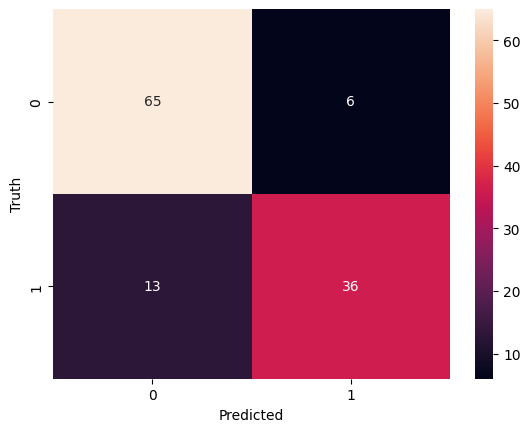

In [15]:
from matplotlib import pyplot as plt
import seaborn as sn

sn.heatmap(cm, annot=True, fmt='d')
plt.xlabel('Predicted')
plt.ylabel('Truth')

In [16]:
print(classification_report(y_test, predictions))

              precision    recall  f1-score   support

           0       0.83      0.92      0.87        71
           1       0.86      0.73      0.79        49

    accuracy                           0.84       120
   macro avg       0.85      0.83      0.83       120
weighted avg       0.84      0.84      0.84       120

